In [1]:
#!/usr/bin/python

# Transforming discrete baryonic mass distributions to EG distributions

# Import the necessary libraries
import numpy as np
import os

from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import LambdaCDM
import astropy.io.fits as pyfits

import modules_EG as utils

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import gridspec
from matplotlib import rc, rcParams

%matplotlib notebook
plt.rcParams['figure.dpi'] = 150

import scipy.constants as const
from scipy.integrate import cumtrapz, trapz, quad, dblquad
from scipy.constants import codata
D = codata.physical_constants

import astropy.units as u
import astropy.constants as const

pi = np.pi
inf = np.inf

# Make use of TeX
rc('text',usetex=True)

# Change all fonts to 'Computer Modern'
rc('font',**{'family':'serif','serif':['Computer Modern']})

In [4]:
# Constants
G = const.G.to('pc3 / (M_sun s2)').value
c = const.c.to('pc/s').value
#G = const.G.to('m3 / (kg s2)').value
#c = const.c.to('m/s').value

H0 = 100 * (u.km/u.s)/u.Mpc
H0 = H0.to('s-1').value

pc_to_m = 3.08567758e16

# Creating the spherical distance bins
nrbins = 1e2
rmin = 0.03# * 1e6 # in pc
rmax = 3# * 1e6 # in pc

rbins = 10.**np.linspace(np.log10(rmin), np.log10(rmax), nrbins+1)
#rbins = np.linspace(rmin, rmax, nrbins+1)
dr = np.diff(rbins)
rcenters = rbins[0:-1]+0.5*dr

In [5]:
y = rcenters
dydr = np.gradient(y, rcenters)

#print(rcenters)
#print(y)
print(dydr)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


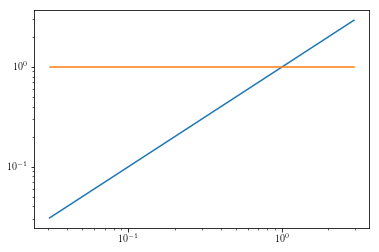

In [8]:
plt.xscale('log')
plt.yscale('log')

plt.plot(rcenters, y)
plt.plot(rcenters, dydr)

plt.show()

In [ ]:
xbins = np.linspace(0,10,11)
y = xbins**2.
dydx_num = np.gradient(y, xbins)#, edge_order=2)
print(dydx_num)

dydx_an = 2*xbins

plt.plot(xbins, y)
plt.plot(xbins, dydx_num)
#plt.plot(x, dydx_an)
plt.show()

In [9]:
x = np.array([0, 1, 2, 3, 4])
y = x**2
np.gradient(y, x, edge_order=2)


array([0., 2., 4., 6., 8.])